In [1]:
import fml

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from fml.preprocessing import detect_types_dataframe
from fml.plotting import plot_supervised

In [2]:
avocado = pd.read_csv("/home/andy/datasets/avocado.csv", parse_dates=['Date'])
telco_churn = pd.read_csv("/home/andy/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#restaurant = pd.read_csv("/home/andy/datasets/restaurant-and-market-health-violations.csv")
titanic = pd.read_csv("fml/tests/titanic.csv")
ames = pd.read_excel("/home/andy/datasets/AmesHousing.xls")
cars = pd.read_excel("/home/andy/datasets/2018 FE Guide for DOE-release dates before 1-24-2018-no-sales-1-23-2018public.xlsx")
accidents = pd.read_csv("/home/andy/datasets/Acc.csv")
violations = pd.read_csv("/home/andy/datasets/Traffic_Violations.csv")
adult = pd.read_csv("http://github.com/amueller/ml-training-advanced/raw/master/notebooks/data/adult.csv")

# individual_donations = pd.read_csv("/home/andy/datasets/itcont.txt")
# FIXME add rent stuff from first year
# FIXME add stuff from Gael's papers

NameError: name 'pd' is not defined

In [3]:
cars = pd.read_excel("/home/andy/datasets/2018 FE Guide for DOE-release dates before 1-24-2018-no-sales-1-23-2018public.xlsx")

types = detect_types_dataframe(cars)

regression
Showing only top 10 of 46 continuous features
Showing only top 10 of 44 categorical features


/home/andy/checkout/scikit-learn/sklearn/feature_selection/mutual_info_.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if discrete_features == 'auto':


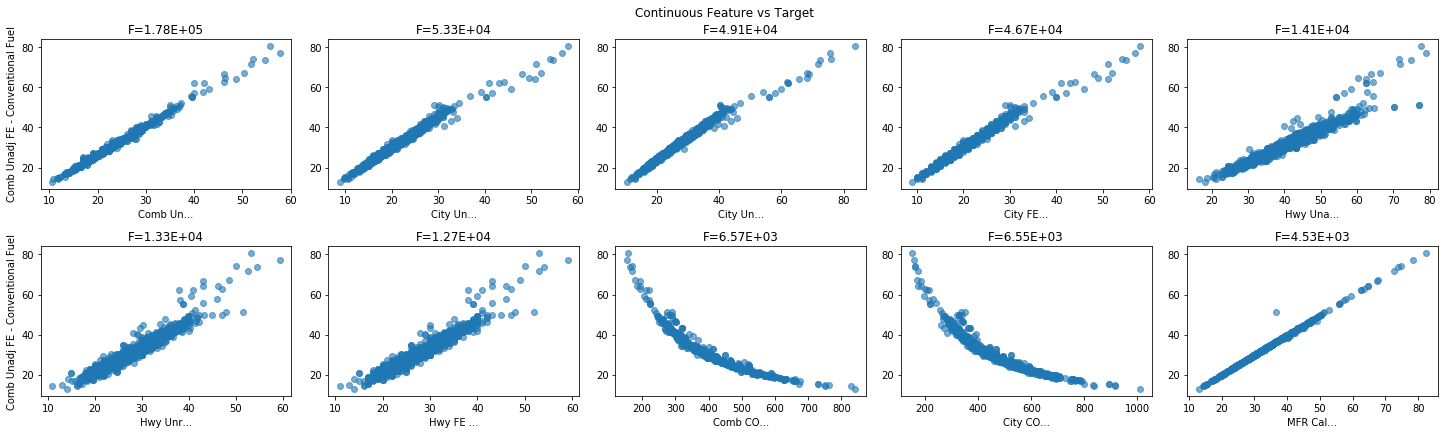

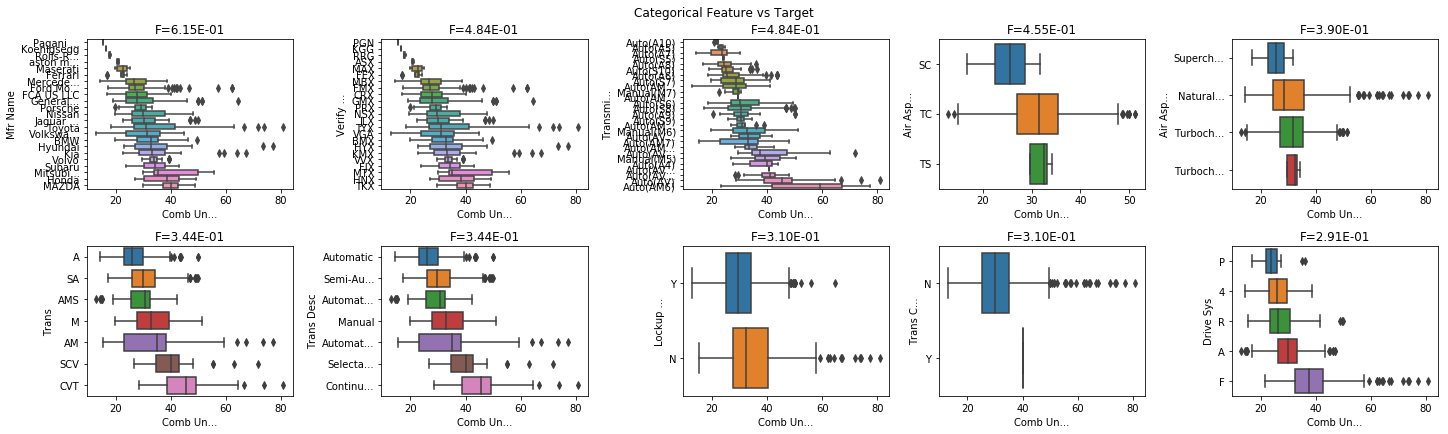

In [4]:
plot_supervised(cars, 'Comb Unadj FE - Conventional Fuel')
ax = plt.gca()

In [34]:
cats = cars.loc[:, types.categorical]

In [41]:
_prune_categories(cats['Mfr Name']).value_counts()

fml_other              254
General Motors         171
BMW                    128
Ford Motor Company     127
Toyota                  88
Volkswagen Group of     85
FCA US LLC              84
Mercedes-Benz           79
Nissan                  70
Porsche                 66
Honda                   56
Name: Mfr Name, dtype: int64

In [39]:

def _prune_categories(series, max_categories=10):
    series = series.astype('category')
    small_categories = series.value_counts()[max_categories:].index
    res = series.cat.remove_categories(small_categories)
    res = res.cat.add_categories(['fml_other']).fillna("fml_other")
    return res

In [46]:
cars[['Mfr Name']].copy()

,Mfr Name
0,Honda
1,FCA US LLC
2,Volkswagen Group of
3,Volkswagen Group of
4,Volkswagen Group of
5,Volkswagen Group of
6,Volkswagen Group of
7,BMW
8,Volkswagen Group of
9,General Motors


In [38]:
asdf.cat.remove_categories(bla).cat.add_categories(['fml_other']).fillna("fml_other")

0                     Honda
1                FCA US LLC
2       Volkswagen Group of
3       Volkswagen Group of
4       Volkswagen Group of
5       Volkswagen Group of
6       Volkswagen Group of
7                       BMW
8       Volkswagen Group of
9            General Motors
10           General Motors
11           General Motors
12           General Motors
13                fml_other
14                fml_other
15                fml_other
16                fml_other
17                fml_other
18               FCA US LLC
19               FCA US LLC
20       Ford Motor Company
21                fml_other
22                fml_other
23                fml_other
24                fml_other
25                fml_other
26                fml_other
27                fml_other
28                fml_other
29                fml_other
               ...         
1178          Mercedes-Benz
1179          Mercedes-Benz
1180          Mercedes-Benz
1181          Mercedes-Benz
1182          Merced

In [29]:
asdf.cat.rename_categories(rename)

ValueError: Categorical categories must be unique

In [11]:
def _shortname(some_string):
    if len(some_string) > 20:
        return some_string[:17] + "..."
    else:
        return some_string

In [17]:
bla = asdf[0]
bla.get_text()

'P'

In [19]:
ax.set_yticklabels([_shortname(x.get_text()) for x in asdf])

[Text(0, 0, 'P'),
 Text(0, 1, '4'),
 Text(0, 2, 'R'),
 Text(0, 3, 'A'),
 Text(0, 4, 'F')]

In [21]:
ax.set_xlabel(_shortname(ax.get_xlabel()))

Text(0.5, 17.200000000000003, 'Comb Unadj FE - C...')

In [24]:
bla = cats.astype('category')

In [28]:
bla.apply(lambda x: x.cat.codes)

,Mfr Name,Verify Mfr Cd,Transmission,Air Aspir Method,Air Aspiration Method Desc,Trans,Trans Desc,Lockup Torque Converter,Trans Creeper Gear,Drive Sys,...,Driver Cntrl Regen Braking?,Motor Gen Type Desc,"Motor Gen Type, If Other",Rated Motor Gen Power (kW),Fuel Metering Sys Cd,Fuel Metering Sys Desc,Camless Valvetrain (Y or N),Stop/Start System (Engine Management System) Code,Stop/Start System (Engine Management System) Description,#2 Smog Rating Test Group
0,5,7,10,1,2,2,1,1,0,1,...,0,2,0,12,1,2,0,1,1,-1
1,1,2,11,1,2,1,0,1,0,4,...,-1,-1,-1,-1,1,2,0,0,0,-1
2,20,21,8,-1,0,2,1,1,0,1,...,-1,-1,-1,-1,2,3,0,0,0,-1
3,20,21,8,-1,0,2,1,1,0,4,...,-1,-1,-1,-1,2,3,0,0,0,-1
4,20,21,8,-1,0,2,1,1,0,1,...,-1,-1,-1,-1,2,3,0,0,0,-1
5,20,21,8,-1,0,2,1,1,0,4,...,-1,-1,-1,-1,2,3,0,0,0,-1
6,20,21,7,1,2,2,1,1,0,1,...,-1,-1,-1,-1,1,2,0,0,0,-1
7,0,1,8,1,2,2,1,0,0,4,...,-1,-1,-1,-1,1,2,0,1,1,-1
8,20,21,8,1,2,2,1,1,0,1,...,-1,-1,-1,-1,3,1,0,0,0,-1
9,4,6,22,-1,0,5,6,1,0,4,...,-1,-1,-1,-1,1,2,0,0,0,-1


In [3]:
ames = pd.read_excel("/home/andy/datasets/AmesHousing.xls")

regression
Showing only top 10 of 24 continuous features
Showing only top 10 of 44 categorical features


/home/andy/checkout/scikit-learn/sklearn/feature_selection/mutual_info_.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if discrete_features == 'auto':


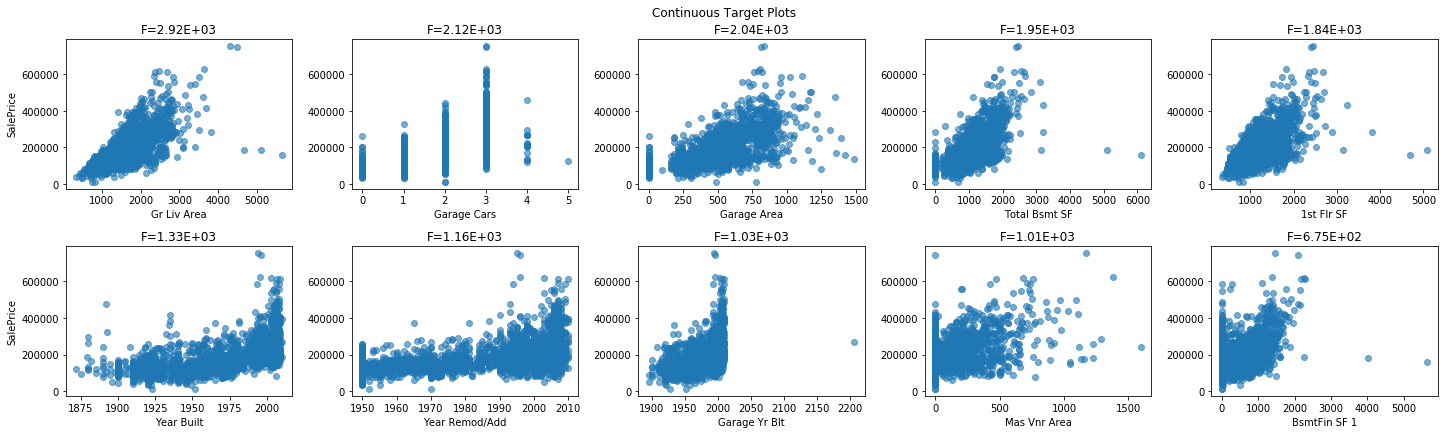

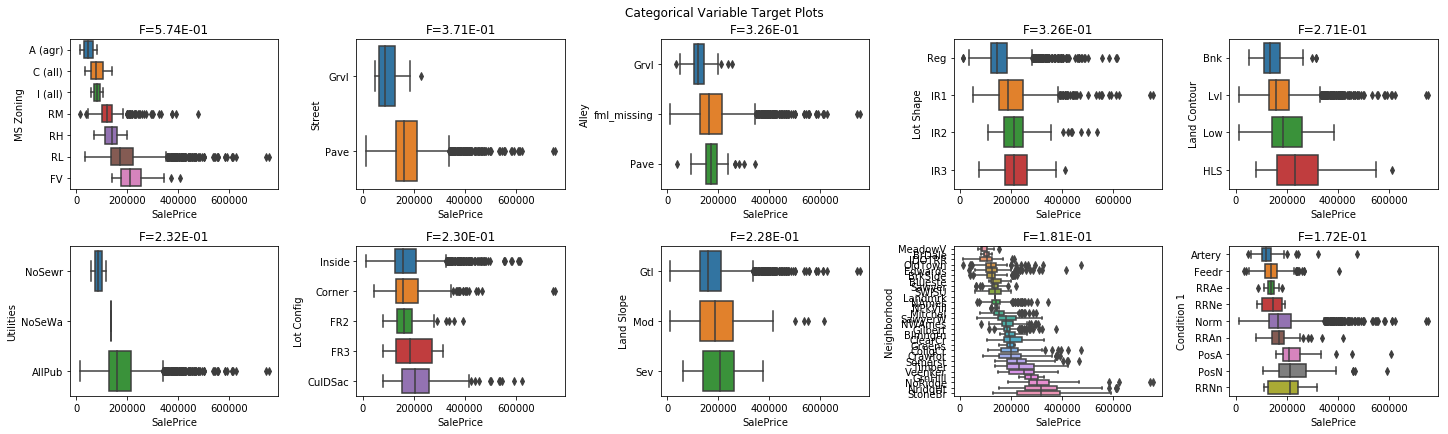

In [4]:
plot_supervised(ames, 'SalePrice')

In [37]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

categorical = ames.loc[:, types.categorical]
f = mutual_info_regression(OrdinalEncoder().fit_transform(SimpleImputer(strategy='constant', fill_value='missing').fit_transform(categorical)),
                       ames.SalePrice, discrete_features=[0])
top_k = np.argsort(f)[::-1]


In [38]:
top_k

array([ 8, 21, 18, 30, 34, 33, 32, 20, 16, 24, 15, 27,  0, 17, 42, 23, 35,
       12, 41, 36, 28, 37,  3, 22, 29, 11, 39,  9,  2, 13, 25, 40,  6,  4,
       31, 19,  5, 14,  7, 38, 10, 26,  1])

In [46]:
categorical.columns[8]

'Neighborhood'

In [41]:
categorical.iloc[:, 8].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [56]:
asdf = ames.groupby('Neighborhood').SalePrice.median()


Index(['MeadowV', 'BrDale', 'IDOTRR', 'OldTown', 'Edwards', 'BrkSide',
       'Blueste', 'Sawyer', 'SWISU', 'Landmrk', 'NAmes', 'NPkVill', 'Mitchel',
       'SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn', 'ClearCr', 'Greens',
       'CollgCr', 'Crawfor', 'Somerst', 'Timber', 'Veenker', 'GrnHill',
       'NoRidge', 'NridgHt', 'StoneBr'],
      dtype='object', name='Neighborhood')

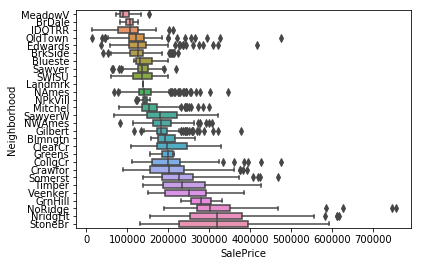

In [57]:
import seaborn as sns
sns.boxplot(x="SalePrice", y="Neighborhood", data=ames, order=asdf.sort_values().index)

Neighborhood
Blmngtn    AxesSubplot(0.125,0.125;0.775x0.755)
Blueste    AxesSubplot(0.125,0.125;0.775x0.755)
BrDale     AxesSubplot(0.125,0.125;0.775x0.755)
BrkSide    AxesSubplot(0.125,0.125;0.775x0.755)
ClearCr    AxesSubplot(0.125,0.125;0.775x0.755)
CollgCr    AxesSubplot(0.125,0.125;0.775x0.755)
Crawfor    AxesSubplot(0.125,0.125;0.775x0.755)
Edwards    AxesSubplot(0.125,0.125;0.775x0.755)
Gilbert    AxesSubplot(0.125,0.125;0.775x0.755)
Greens     AxesSubplot(0.125,0.125;0.775x0.755)
GrnHill    AxesSubplot(0.125,0.125;0.775x0.755)
IDOTRR     AxesSubplot(0.125,0.125;0.775x0.755)
Landmrk    AxesSubplot(0.125,0.125;0.775x0.755)
MeadowV    AxesSubplot(0.125,0.125;0.775x0.755)
Mitchel    AxesSubplot(0.125,0.125;0.775x0.755)
NAmes      AxesSubplot(0.125,0.125;0.775x0.755)
NPkVill    AxesSubplot(0.125,0.125;0.775x0.755)
NWAmes     AxesSubplot(0.125,0.125;0.775x0.755)
NoRidge    AxesSubplot(0.125,0.125;0.775x0.755)
NridgHt    AxesSubplot(0.125,0.125;0.775x0.755)
OldTown    AxesSubplot(0.12

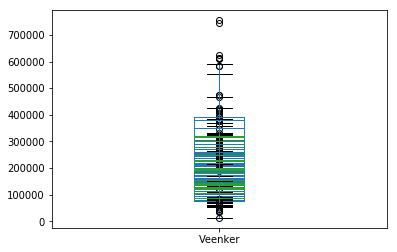

In [44]:
ames.SalePrice.groupby(categorical.iloc[:, 8]).plot(kind='box')

In [15]:
ames['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [9]:
ames.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

regression
Showing only top 10 of 24 continuous features
Showing only top 10 of 44 categorical features


/home/andy/checkout/scikit-learn/sklearn/feature_selection/mutual_info_.py:250: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if discrete_features == 'auto':


ValueError: Grouper for '8' not 1-dimensional

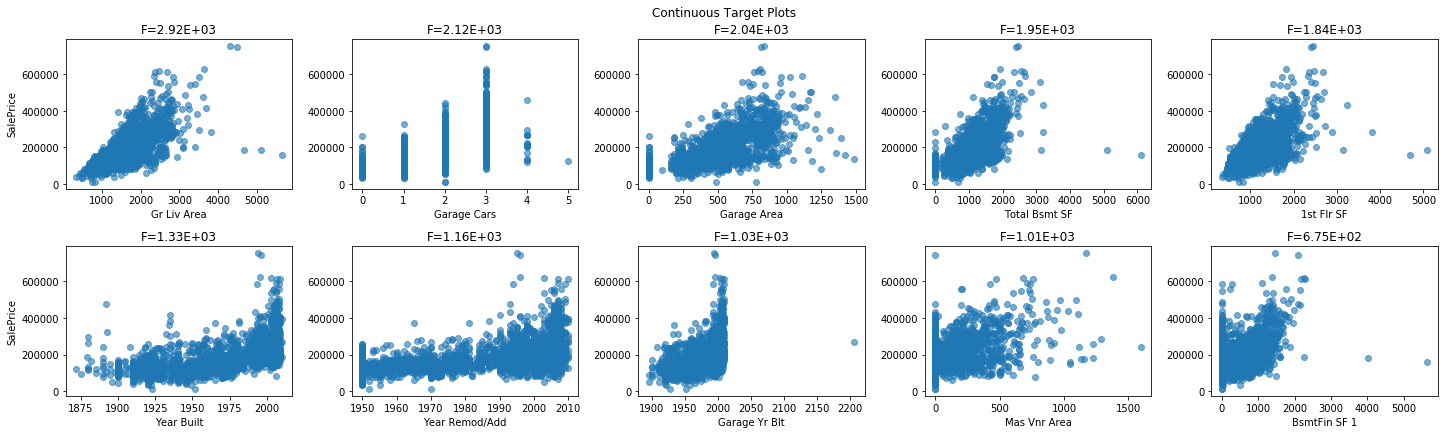

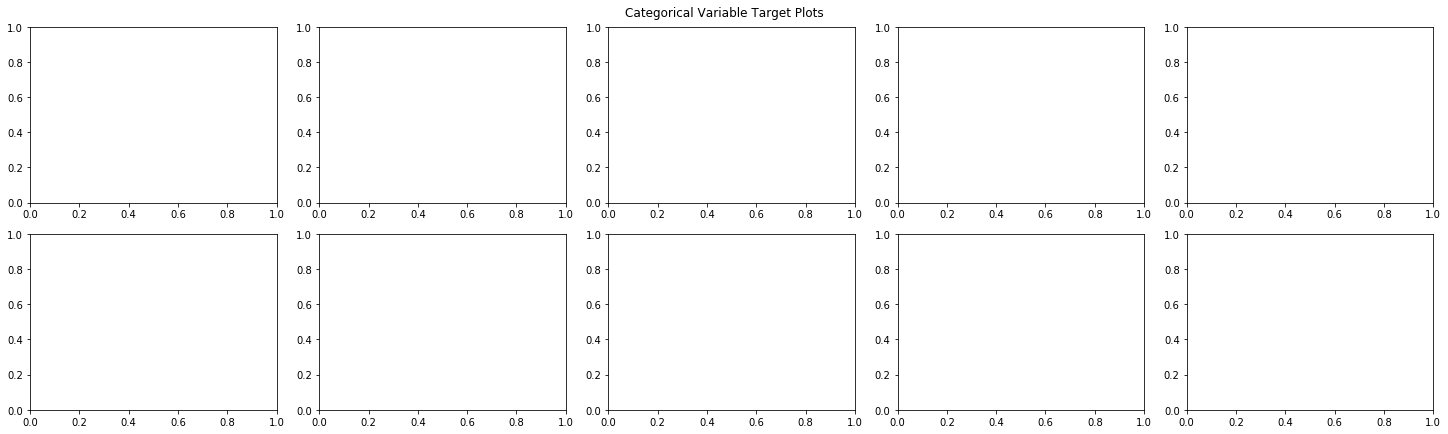

In [5]:
%debug

> /home/andy/checkout/scikit-learn/sklearn/feature_selection/mutual_info_.py(260)_estimate_mi()
    258         if discrete_features.dtype != 'bool':
    259             discrete_mask = np.zeros(n_features, dtype=bool)
--> 260             discrete_mask[discrete_features] = True
    261         else:
    262             discrete_mask = discrete_features



ipdb>  p n_features


43


ipdb>  p discrete_features


array([   0,    1,    2, ..., 2927, 2928, 2929])


ipdb>  exit


In [3]:
from sklearn.datasets import load_diabetes, load_boston
diabetes = load_diabetes()
boston = load_boston()

In [4]:
def make_data_df(data_bunch):
    df = pd.DataFrame(data_bunch.data, columns=data_bunch.feature_names)
    df['target'] = data_bunch.target
    return df

diabetes_df = make_data_df(diabetes)

regression


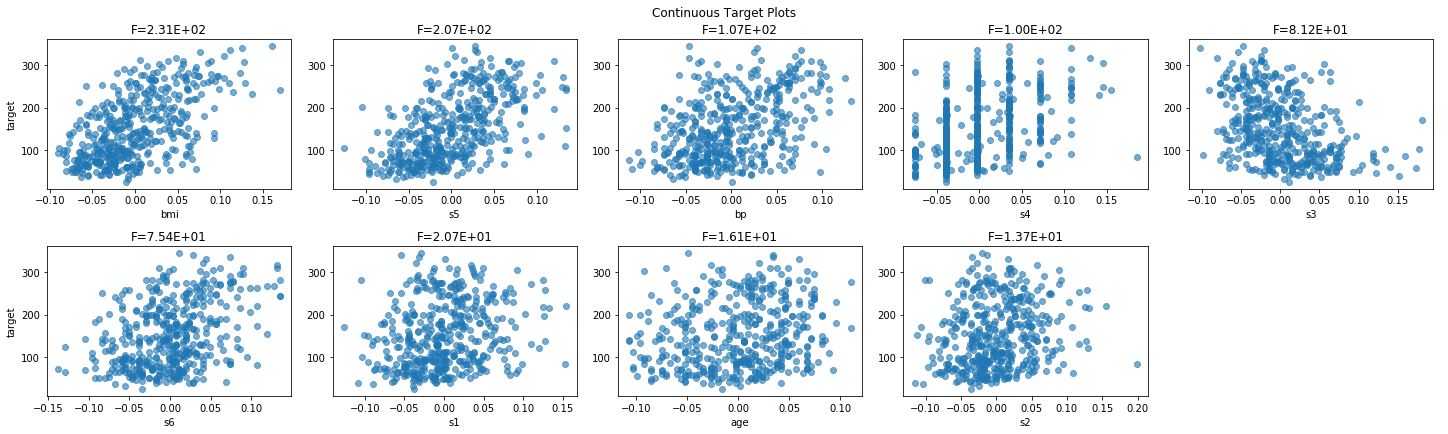

In [6]:
plot_supervised(diabetes_df, 'target')

regression


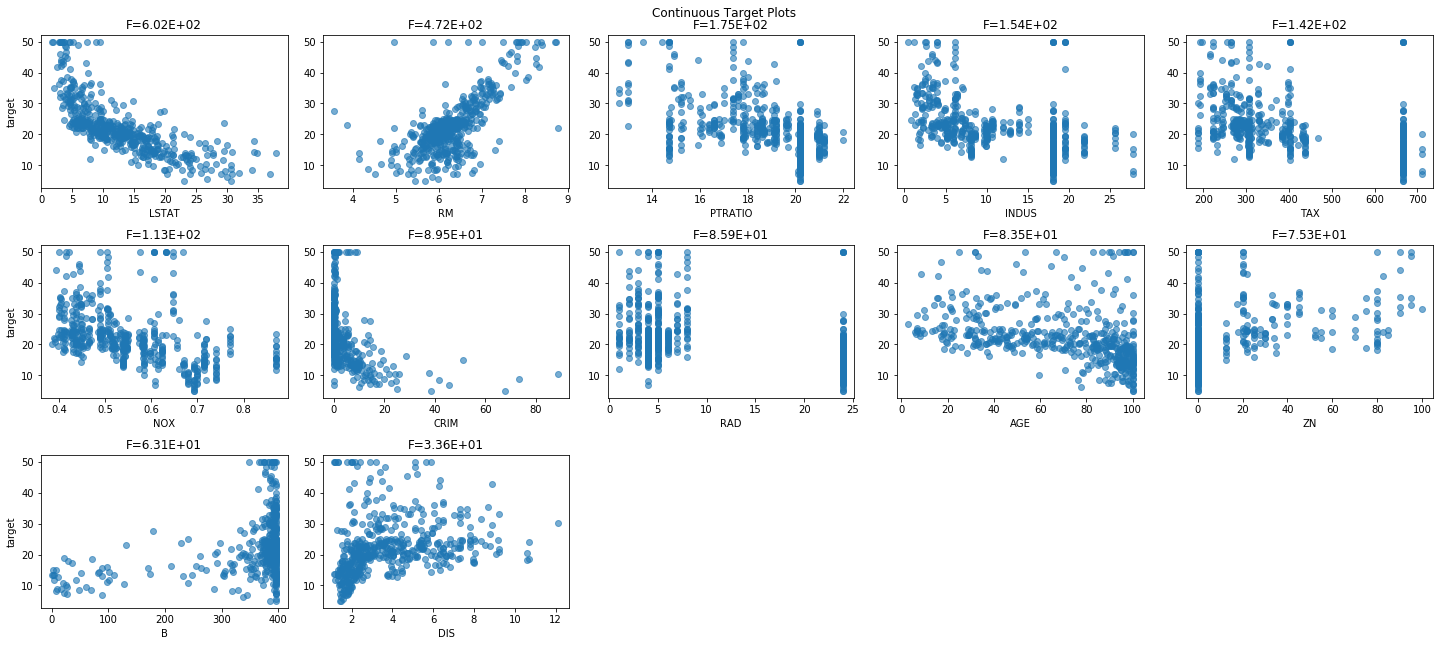

In [7]:
plot_supervised(make_data_df(boston), 'target')

In [103]:
def fit_poisson(values):
    mean = np.mean(values)
    p = scipy.stats.poisson(mean).logpmf(values).mean()
    return p

def fit_binomial(values):
    m = np.max(x)
    p = y.mean() / m
    bn = scipy.stats.binom(m, p)
    return bn.logpmf(values).mean()

In [69]:
scipy.stats.poisson(3).logpmf(y).mean()

-30.697407235919073

In [68]:
poi.logpmf(y).mean()

-3.128128725932491

/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00165563, 0.00413907, 0.0057947 , 0.01241722, 0.01572848,
        0.0281457 , 0.04635762, 0.06788079, 0.08029801, 0.06374172,
        0.07119205, 0.0852649 , 0.08195364, 0.07201987, 0.0736755 ,
        0.04801325, 0.05298013, 0.03890728, 0.03062914, 0.02152318,
        0.01903974, 0.02566225, 0.0115894 , 0.0115894 , 0.00827815,
        0.00413907, 0.00124172, 0.00082781, 0.00165563, 0.00165563,
        0.00027594, 0.00082781, 0.00082781, 0.00041391, 0.00055188,
        0.00082781, 0.00082781]),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 46, 49, 50,
        52, 55, 56, 58]),
 <a list of 37 Patch objects>)

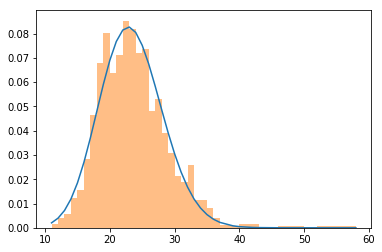

In [94]:
x = np.unique(y)
plt.plot(x, poi.pmf(x))
plt.hist(y, alpha=.5, bins=np.unique(y), normed=True)

In [104]:
fit_binomial(y)

-3.3900283537733347

In [105]:
fit_poisson(y)

-3.128128725932491

/home/andy/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00165563, 0.00413907, 0.0057947 , 0.01241722, 0.01572848,
        0.0281457 , 0.04635762, 0.06788079, 0.08029801, 0.06374172,
        0.07119205, 0.0852649 , 0.08195364, 0.07201987, 0.0736755 ,
        0.04801325, 0.05298013, 0.03890728, 0.03062914, 0.02152318,
        0.01903974, 0.02566225, 0.0115894 , 0.0115894 , 0.00827815,
        0.00413907, 0.00124172, 0.00082781, 0.00165563, 0.00165563,
        0.00027594, 0.00082781, 0.00082781, 0.00041391, 0.00055188,
        0.00082781, 0.00082781]),
 array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 46, 49, 50,
        52, 55, 56, 58]),
 <a list of 37 Patch objects>)

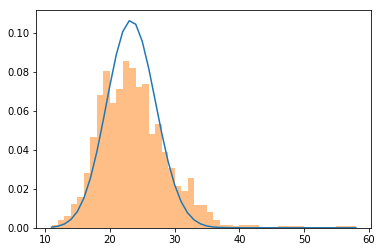

In [93]:
m = np.max(x)
p = y.mean() / m
bn = scipy.stats.binom(m, p)
plt.plot(x, bn.pmf(x))
plt.hist(y, alpha=.5, bins=np.unique(y), normed=True)

In [97]:
perm

array([12, 15,  3, 14,  1,  4, 10, 11,  0, 13,  2,  8,  5,  7,  9,  6])

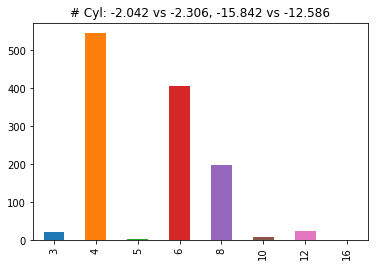

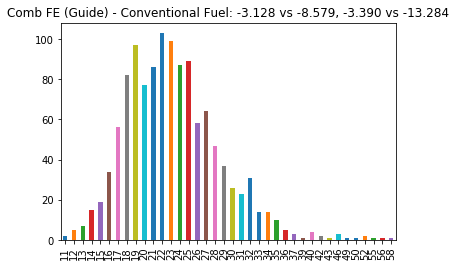

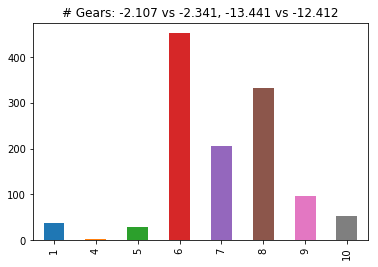

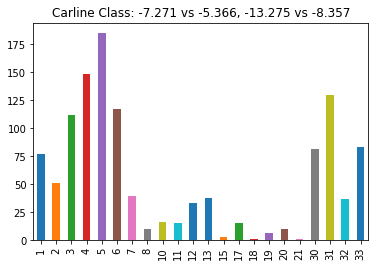

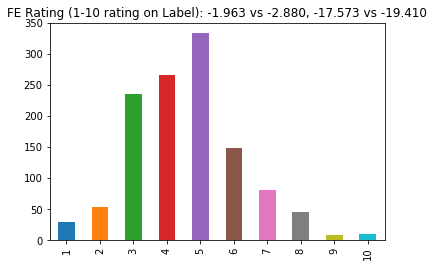

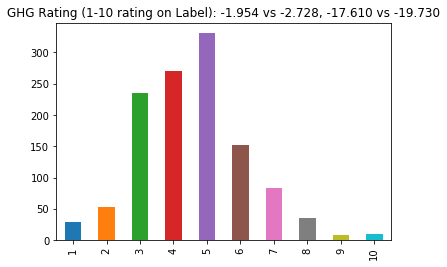

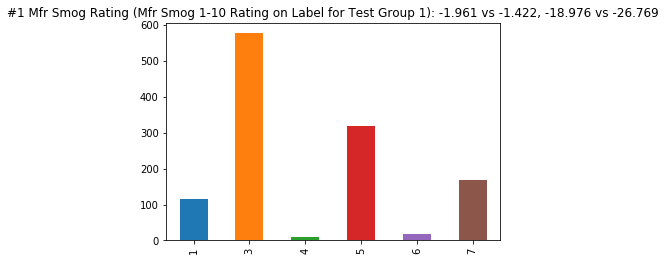

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
for c in bla.columns:
    col = bla[c]
    perm = np.random.permutation(col.max() + 1)
    plt.figure()
    col.value_counts().sort_index().plot.bar()
    plt.gca().set_title("{}: {:.3f} vs {:.3f}, {:.3f} vs {:.3f}".format(c, fit_poisson(col), fit_poisson(perm[col]), fit_binomial(col), fit_binomial(perm[col])))

In [10]:
cars['Comb FE (Guide) - Conventional Fuel'].dtype

dtype('int64')

In [9]:
types.loc['Comb FE (Guide) - Conventional Fuel']

continuous      False
dirty_float     False
low_card_int     True
categorical     False
date            False
free_string     False
useless         False
Name: Comb FE (Guide) - Conventional Fuel, dtype: bool

regression


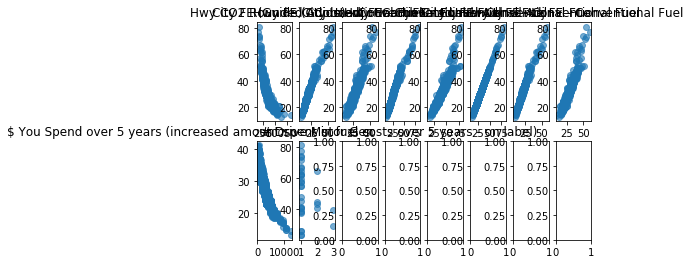

In [5]:
from fml.plotting import plot_supervised
%matplotlib inline
plot_supervised(cars, 'Comb Unadj FE - Conventional Fuel')

In [9]:
types.loc['#4 Smog Rating Test Group']

continuous      False
dirty_float     False
low_card_int    False
categorical     False
date            False
free_string     False
useless          True
Name: #4 Smog Rating Test Group, dtype: bool

In [10]:
grr = cars.loc[:, types.continuous]

In [11]:
grr.nunique()

Index (Model Type Index)                                                                                      469
Eng Displ                                                                                                      42
City FE (Guide) - Conventional Fuel                                                                            43
Hwy FE (Guide) - Conventional Fuel                                                                             42
City Unadj FE - Conventional Fuel                                                                             643
Hwy Unadj FE - Conventional Fuel                                                                              696
Comb Unadj FE - Conventional Fuel                                                                             955
City Unrd Adj FE - Conventional Fuel                                                                          677
Hwy Unrd Adj FE - Conventional Fuel                                                     

In [12]:
types.index[types.continuous]

Index(['# Batteries', '# Drive Motor Gen',
       '#2 Mfr Smog Rating (Mfr Smog 1-10 Rating on Label for Test Group 2)',
       '$ You Save over 5 years (amount saved in fuel costs over 5 years - on label) ',
       '$ You Spend over 5 years (increased amount spent in fuel costs over 5 years - on label) ',
       '2Dr Lugg Vol', '2Dr Pass Vol', '4Dr Lugg Vol', '4Dr Pass Vol',
       'Annual Fuel1 Cost - Conventional Fuel',
       'Batt Energy Capacity (Amp-hrs)', 'Batt Specific Energy (Watt-hr/kg)',
       'City CO2 Rounded Adjusted', 'City CO2 Rounded Adjusted - Fuel2',
       'City FE (Guide) - Conventional Fuel',
       'City Unadj FE - Conventional Fuel',
       'City Unrd Adj FE - Conventional Fuel',
       'City2 FE (Guide) - Alternative Fuel',
       'City2 Unadj FE - Alternative Fuel',
       'City2 Unrd Adj FE - Alternative Fuel',
       'Cmb2 Unrd Adj FE - Alternative Fuel',
       'Comb CO2 Rounded Adjusted (as shown on FE Label)',
       'Comb CO2 Rounded Adjusted - Fuel2',

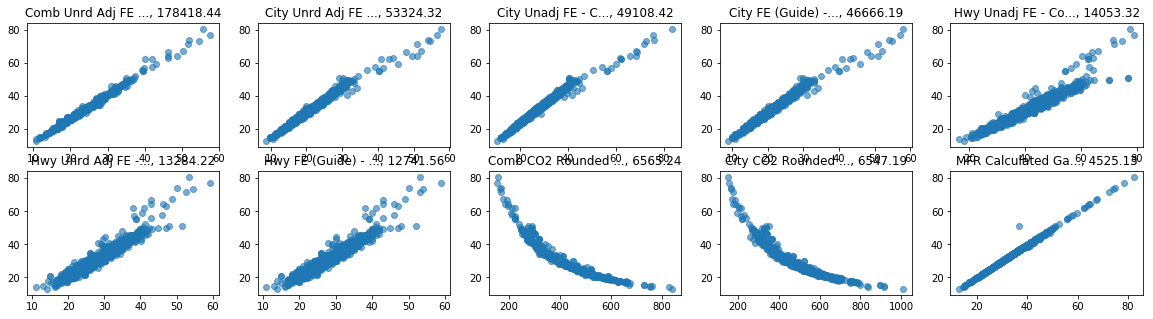

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.constrained_layout.use'] = False

def _shortname(some_string):
    if len(some_string) > 20:
        return some_string[:17] + "..."
    else:
        return some_string

X = cars.loc[:, types.continuous]
target = 'Comb Unadj FE - Conventional Fuel'
features = X.drop(target, axis=1)
target = X[target]

if X.shape[1] > 20:
    # too many features, show just top 10
    show_top = 10
else:
    show_top = X.shape[1]
# Several weird things: why are constant columns in features?
# why does simple imputer drop columns
# why are nan columns important?
features_imp = SimpleImputer().fit_transform(features)
f, p = f_regression(features_imp, target)
top_k = np.argsort(f)[-show_top:][::-1]
# we could do better lol
n_cols = 5
fig, axes = plt.subplots(int(np.ceil(show_top / n_cols)), n_cols, figsize=(20, 5))
for col, ax in zip(top_k, axes.ravel()):
    ax.plot(features.iloc[:, col], target, 'o', alpha=.6)
    ax.set_title("{}, {:.2f}".format(_shortname(features.columns[col]), f[col]))


In [7]:
np.argsort(f)

array([10, 13, 14, 11, 32, 15, 39, 34, 36, 38, 29, 28, 27, 31, 30, 19, 18,
       25, 22, 24, 21, 20, 26, 23, 33,  9, 35, 12,  0, 40, 41,  1, 43, 17,
       16, 37, 42, 44,  3,  7,  5,  2,  4,  6,  8])

In [8]:
np.argsort(p)

array([44,  2,  3,  4,  5,  6,  7,  8, 42, 37, 43, 17, 16,  1, 41, 40,  0,
       12, 35,  9, 33, 23, 26, 20, 21, 24, 22, 25, 18, 19, 30, 31, 27, 28,
       29, 38, 36, 34, 39, 15, 32, 11, 14, 13, 10])

In [9]:
np.sort(p)

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 2.14268906e-209, 2.51593458e-076, 7.47517743e-042,
       7.01490266e-018, 2.72100942e-015, 1.04419080e-007, 5.63036910e-005,
       9.06207177e-004, 1.20109349e-003, 1.22121397e-003, 1.24116609e-003,
       1.42204637e-003, 1.46310342e-003, 1.50301902e-003, 1.51858970e-003,
       1.57630651e-003, 1.59405934e-003, 1.62963711e-003, 1.70230419e-003,
       1.70230419e-003, 1.76498627e-003, 2.02560288e-003, 2.48382660e-003,
       2.79483791e-003, 2.93060293e-003, 4.24458889e-003, 1.33435428e-002,
       5.65884893e-001, 6.84267581e-001, 7.45886217e-001, 7.92762452e-001,
       8.66329403e-001])

In [10]:
np.sort(f)

array([2.83446193e-02, 6.90550895e-02, 1.05068483e-01, 1.65441359e-01,
       3.29798440e-01, 6.14110398e+00, 8.20729074e+00, 8.88642577e+00,
       8.97371286e+00, 9.19110868e+00, 9.56789116e+00, 9.82302546e+00,
       9.89009961e+00, 9.89009961e+00, 9.97106863e+00, 1.00120569e+01,
       1.00328580e+01, 1.01021655e+01, 1.01213210e+01, 1.01713609e+01,
       1.02242974e+01, 1.04776102e+01, 1.05078166e+01, 1.05387886e+01,
       1.10650335e+01, 1.63395073e+01, 2.86366905e+01, 6.41314384e+01,
       7.65758702e+01, 1.98537854e+02, 3.95413124e+02, 1.45410027e+03,
       3.96360853e+03, 4.32824109e+03, 4.32824109e+03, 4.52513366e+03,
       6.54718944e+03, 6.56524149e+03, 1.27415628e+04, 1.32842243e+04,
       1.40533230e+04, 4.66661892e+04, 4.91084169e+04, 5.33243179e+04,
       1.78418443e+05])

In [28]:
features[:, 44]

array([420., 317., 531., ..., 614., 365., 394.])

In [13]:
types.sum()

continuous      87
dirty_float      0
low_card_int     7
categorical     43
date             1
free_string      7
useless         17
dtype: int64

In [24]:
detect_types_dataframe(telco_churn).T.idxmax()

Churn               categorical
Contract            categorical
Dependents          categorical
DeviceProtection    categorical
InternetService     categorical
MonthlyCharges       continuous
MultipleLines       categorical
OnlineBackup        categorical
OnlineSecurity      categorical
PaperlessBilling    categorical
Partner             categorical
PaymentMethod       categorical
PhoneService        categorical
SeniorCitizen       categorical
StreamingMovies     categorical
StreamingTV         categorical
TechSupport         categorical
TotalCharges        dirty_float
customerID          free_string
gender              categorical
tenure               continuous
dtype: object

In [9]:
detect_types_dataframe(avocado).T.idxmax()

4046              continuous
4225              continuous
4770              continuous
AveragePrice      continuous
Date                    date
Large Bags        continuous
Small Bags        continuous
Total Bags        continuous
Total Volume      continuous
Unnamed: 0      low_card_int
XLarge Bags       continuous
region               useless
type             categorical
year            low_card_int
dtype: object

In [4]:
from fml.preprocessing import FriendlyPreprocessor

In [5]:
# sp = FriendlyPreprocessor(verbose=10)
# sp.fit(avocado)

In [6]:
y = telco_churn.Churn
X = telco_churn.drop("Churn", axis=1)

In [7]:
y.value_counts() / y.size

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [8]:
from fml.models import FriendlyClassifier

In [9]:
# %%prun -s cumulative -l 100 -D test.prof
fc = FriendlyClassifier().fit(X, y)

Detected feature types:
1 float, 2 int, 17 object, 0 date, 0 other
Interpreted as:
3 continuous, 15 categorical, 0 date, 1 dirty float, 1 dropped
DummyClassifier(strategy='prior')
accuracy: 0.7346    average_precision: 0.2654    recall_macro: 0.5000    roc_auc: 0.5000    
new best: 0.5000
GaussianNB()
accuracy: 0.6320    average_precision: 0.6081    recall_macro: 0.7169    roc_auc: 0.8182    
new best: 0.7169
MultinomialNB()
accuracy: 0.7177    average_precision: 0.6067    recall_macro: 0.7481    roc_auc: 0.8174    
new best: 0.7481
DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.6544    average_precision: 0.4087    recall_macro: 0.7282    roc_auc: 0.7282    
DecisionTreeClassifier(class_weight='balanced', max_depth=5)
accuracy: 0.7238    average_precision: 0.6105    recall_macro: 0.7510    roc_auc: 0.8293    
new best: 0.7510
DecisionTreeClassifier(class_weight='balanced', min_impurity_decrease=0.01)
accuracy: 0.7233    average_precision: 0.4837    recall_macr

In [9]:
adult = pd.read_csv("http://github.com/amueller/ml-training-advanced/raw/master/notebooks/data/adult.csv")

In [10]:
# from sklearn.datasets import fetch_openml
# adult = fetch_openml("adult-census")
# adult_df = pd.DataFrame(adult.data, columns=adult.feature_names)

In [11]:
y = adult.income
X = adult.drop("income", axis=1)

In [12]:
X.columns

Index(['Unnamed: 0', 'age', 'workclass', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [17]:
X.shape

(32561, 14)

In [20]:
from fml.preprocessing import detect_types_dataframe
detect_types_dataframe(X)

,continuous,categorical,date,dirty_float,useless
Unnamed: 0,True,False,False,False,False
age,True,True,False,False,False
capital-gain,True,True,False,False,False
capital-loss,True,True,False,False,False
education,False,True,False,False,False
education-num,True,True,False,False,False
gender,False,True,False,False,False
hours-per-week,True,True,False,False,False
marital-status,False,True,False,False,False
native-country,False,True,False,False,False


In [21]:
n_values = X.apply(lambda x: x.nunique())
n_values

Unnamed: 0        32561
age                  73
workclass             9
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
gender                2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
dtype: int64

In [22]:
fc = FriendlyClassifier().fit(X, y)

Detected feature types:
0 float, 6 int, 8 object, 0 date, 0 other
Interpreted as:
6 continuous, 13 categorical, 0 date, 0 dirty float, 0 dropped
DummyClassifier(strategy='prior')
accuracy: 0.7592    average_precision: 0.2408    recall_macro: 0.5000    roc_auc: 0.5000    
new best: 0.5000


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [ ]:
from fml.preprocessing import detect_types_dataframe

In [ ]:
asdf = detect_types_dataframe(X, verbose=10)

In [16]:
asdf.categorical

Contract             True
Dependents           True
DeviceProtection     True
InternetService      True
MonthlyCharges      False
MultipleLines        True
OnlineBackup         True
OnlineSecurity       True
PaperlessBilling     True
Partner              True
PaymentMethod        True
PhoneService         True
SeniorCitizen       False
StreamingMovies      True
StreamingTV          True
TechSupport          True
TotalCharges        False
customerID          False
gender               True
tenure               True
Name: categorical, dtype: bool

In [20]:
"".join("{}: {} ".format(a, b) for a, b in asdf.categorical.items())

'Contract: True Dependents: True DeviceProtection: True InternetService: True MonthlyCharges: False MultipleLines: True OnlineBackup: True OnlineSecurity: True PaperlessBilling: True Partner: True PaymentMethod: True PhoneService: True SeniorCitizen: False StreamingMovies: True StreamingTV: True TechSupport: True TotalCharges: False customerID: False gender: True tenure: True '

In [15]:
X_cleanish.shape

(7043, 119)

In [16]:
fp = FriendlyPreprocessor()
fp.fit_transform(X_cleanish).shape

(7043, 192)

In [18]:
%%prun -s cumulative -l 100 -D test.prof
X_cleanish = safe_cleanup(X, onehot=True)
fc = FriendlyClassifier().fit(X_cleanish, y)

DummyClassifier(constant=None, random_state=None, strategy='prior')
fit_time                   0.004455
score_time                 0.010412
test_accuracy              0.734630
train_accuracy             0.734630
test_average_precision     0.265370
train_average_precision    0.265370
test_roc_auc               0.500000
train_roc_auc              0.500000
test_precision_macro       0.367315
train_precision_macro      0.367315
dtype: float64
GaussianNB(priors=None, var_smoothing=1e-09)
fit_time                   0.098654
score_time                 0.050067
test_accuracy              0.596049
train_accuracy             0.610500
test_average_precision     0.420463
train_average_precision    0.439988
test_roc_auc               0.724284
train_roc_auc              0.747796
test_precision_macro       0.642855
train_precision_macro      0.656280
dtype: float64
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
fit_time                   0.100408
score_time                 0.044273
test_a

         1538259 function calls (1514676 primitive calls) in 6.158 seconds

   Ordered by: cumulative time
   List reduced from 1420 to 100 due to restriction <100>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    6.158    6.158 {built-in method builtins.exec}
        1    0.000    0.000    6.157    6.157 <string>:2(<module>)
        1    0.000    0.000    5.885    5.885 models.py:25(fit)
        5    0.000    0.000    5.845    1.169 models.py:65(_evaluate_one)
        5    0.000    0.000    5.835    1.167 _validation.py:40(cross_validate)
    205/5    0.009    0.000    5.821    1.164 parallel.py:932(__call__)
   630/30    0.005    0.000    5.820    0.194 parallel.py:801(dispatch_one_batch)
   425/25    0.004    0.000    5.757    0.230 parallel.py:764(_dispatch)
   425/25    0.001    0.000    5.757    0.230 _parallel_backends.py:180(apply_async)
   425/25    0.001    0.000    5.757    0.230 _parallel_backends.py:542(__init__)
   42